In [1]:
import torch
import torch.nn.functional as F

# Sample image and kernel
image = torch.rand(1, 1, 6, 6)  # (batch_size, channels, height, width)
kernel = torch.ones(1, 1, 3, 3)

# Different stride values
strides = [1, 2, 3]

for stride in strides:
    out_image = F.conv2d(image, kernel, stride=stride, padding=0)
    print(f"For stride={stride}, output image shape: {out_image.shape}")


For stride=1, output image shape: torch.Size([1, 1, 4, 4])
For stride=2, output image shape: torch.Size([1, 1, 2, 2])
For stride=3, output image shape: torch.Size([1, 1, 2, 2])


In [2]:
import torch
import torch.nn.functional as F

# Sample image and kernel
image = torch.rand(1, 1, 6, 6)
kernel = torch.ones(1, 1, 3, 3)

# Different padding values
paddings = [0, 1, 2]

for padding in paddings:
    out_image = F.conv2d(image, kernel, stride=1, padding=padding)
    print(f"For padding={padding}, output image shape: {out_image.shape}")


For padding=0, output image shape: torch.Size([1, 1, 4, 4])
For padding=1, output image shape: torch.Size([1, 1, 6, 6])
For padding=2, output image shape: torch.Size([1, 1, 8, 8])


In [3]:
# Parameters in the convolutional layer
input_channels = 1
output_channels = 1
kernel_size = 3
conv_params = (input_channels * output_channels * kernel_size * kernel_size) + output_channels

print(f"Total number of parameters in the network: {conv_params}")


Total number of parameters in the network: 10


# q2

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Sample image and kernel
image = torch.rand(1, 1, 6, 6)  # (batch_size, channels, height, width)
out_channels = 3
kernel_size = 3

# Apply torch.nn.Conv2d
conv_layer = nn.Conv2d(in_channels=1, out_channels=out_channels, kernel_size=kernel_size)
conv_output = conv_layer(image)
print("Output shape using nn.Conv2d:", conv_output.shape)

# Implement equivalent using torch.nn.functional.conv2d
kernel = torch.ones(out_channels, 1, kernel_size, kernel_size)
conv_output_functional = F.conv2d(image, kernel, stride=1, padding=0)
print("Output shape using functional.conv2d:", conv_output_functional.shape)

# Check if the outputs are the same
print("Outputs are equal:", torch.allclose(conv_output, conv_output_functional))


Output shape using nn.Conv2d: torch.Size([1, 3, 4, 4])
Output shape using functional.conv2d: torch.Size([1, 3, 4, 4])
Outputs are equal: False


# q3

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Number of learnable parameters: 421642
Epoch [1/5], Loss: 0.1691333744660028
Epoch [2/5], Loss: 0.04882837298970574
Epoch [3/5], Loss: 0.033636031925015755
Epoch [4/5], Loss: 0.024595925978702384
Epoch [5/5], Loss: 0.019446905639428677
Accuracy on test set: 99.04%


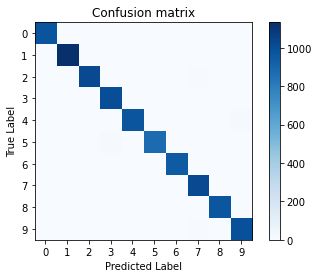

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define transforms and create data loaders
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define CNN model architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
model = CNN()

# Count the number of learnable parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Number of learnable parameters:", num_params)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the CNN model
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(trainloader)}")

# Evaluate the CNN model
model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        predicted_labels.extend(predicted.numpy())
        true_labels.extend(labels.numpy())

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = list(range(10))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# q4

Number of learnable parameters in modified model: 105866
Epoch [1/5], Loss: 0.23081656461477335
Epoch [2/5], Loss: 0.05880132100747418
Epoch [3/5], Loss: 0.04198756946924963
Epoch [4/5], Loss: 0.03273561195414419
Epoch [5/5], Loss: 0.02703679359821689


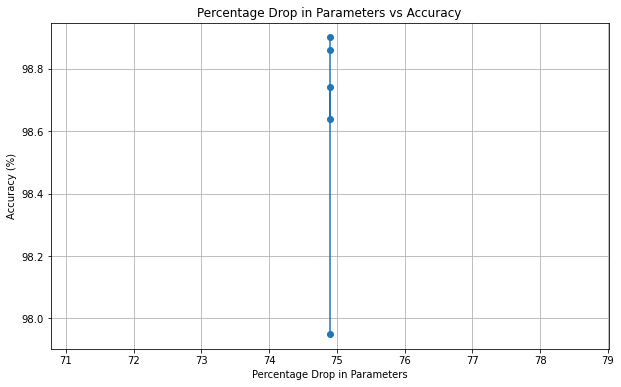

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define transforms and create data loaders
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define Modified CNN model architecture
class ModifiedCNN(nn.Module):
    def __init__(self):
        super(ModifiedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the modified model
modified_model = ModifiedCNN()

# Count the number of learnable parameters in the modified model
modified_num_params = sum(p.numel() for p in modified_model.parameters() if p.requires_grad)
print("Number of learnable parameters in modified model:", modified_num_params)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modified_model.parameters(), lr=0.001)

# Training the Modified CNN model
num_epochs = 5
modified_accuracy_list = []
modified_num_params_list = []

for epoch in range(num_epochs):
    modified_model.train()
    running_loss = 0.0

    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = modified_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(trainloader)}")

    # Evaluate the modified model on the test set
    modified_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = modified_model(images)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    modified_accuracy_list.append(accuracy)
    modified_num_params_list.append(modified_num_params)

# Plot the percentage drop in parameters vs accuracy
baseline_num_params = num_params
percentage_drop = [(baseline_num_params - num_params) / baseline_num_params * 100 for num_params in modified_num_params_list]

plt.figure(figsize=(10, 6))
plt.plot(percentage_drop, modified_accuracy_list, marker='o')
plt.title('Percentage Drop in Parameters vs Accuracy')
plt.xlabel('Percentage Drop in Parameters')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()
